# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [1]:
from sklearn.datasets import load_boston
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

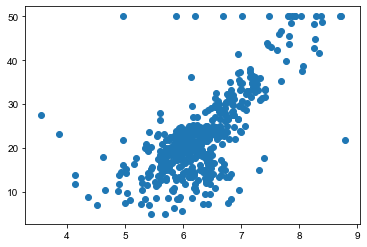

In [2]:
dataset = load_boston()
x, y = dataset['data'], dataset['target']
X_rm = x[:, 5]
plt.scatter(X_rm, y)

In [3]:
def price(x, k, b):
    return k * x + b

def loss_fuction(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(list(y))

def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2/n * gradient

In [6]:
k = random.random() * 200 - 100
b = random.random() * 200 - 100

learning_rate = 0.001

iteration_num = 200
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(age, k, b) for age in X_rm]
    
    current_loss = loss_fuction(y, price_use_current_parameters)
    losses.append(current_loss)
    print(f"Iteration {i}, the loss is {current_loss}, parameters k is {k} and b is {b}")
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 49444.72842682471, parameters k is -23.219100941223886 and b is -52.64638918323252
Iteration 1, the loss is 41679.54095149014, parameters k is -20.408151966660192 and b is -52.20418367178062
Iteration 2, the loss is 35134.98383633867, parameters k is -17.827577093972657 and b is -51.79819414452489
Iteration 3, the loss is 29619.18296385206, parameters k is -15.458496105243805 and b is -51.42545253549173
Iteration 4, the loss is 24970.42541696605, parameters k is -13.283576103300724 and b is -51.08323402537301
Iteration 5, the loss is 21052.418360129082, parameters k is -11.286904701659314 and b is -50.769037106342424
Iteration 6, the loss is 17750.293189399043, parameters k is -9.453873607136199 and b is -50.480565280651895
Iteration 7, the loss is 14967.237800762508, parameters k is -7.771071743401326 and b is -50.2157102591122
Iteration 8, the loss is 12621.658241113128, parameters k is -6.226187133547281 and b is -49.972536536535436
Iteration 9, the loss is 

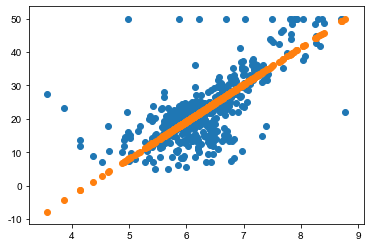

In [7]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_use_current_parameters)

In [8]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

#### 2. 回答以下理论题目

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

每条路径的权重（cost）为相同且非负。

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

启发式搜索的A*算法，除了考虑同出发点的距离以外，还考虑了同目标点的距离，以一个预估值表示。
如果要求最短距离，则一定选择预估值小于等于实际距离；如果不一定求解最优解，而是要速度快，则可以选择预估值大于等于实际距离。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

BFS可以得到最短路径，但时间消耗多；DFS不一定得到最短路径，但时间消耗相比少。

##### 2.4 When can we use machine learning ?

依据以往的经验进行学习并提升在特定工程中的表现；比如预测，数据挖掘，自动驾驶，自然语言处理等。

##### 2.5 What is the gradient of a function ?

函数某一点的梯度为这一点方向导数沿着该方向取得最大值。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

可以用梯度上升，将梯度下降公式中的“-”学习率乘梯度变为“+”学习率乘梯度。

#### 3. 实践部分  寻找地铁路线

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

#### Procedures

#### 1. Get data from web.  

In [9]:
import numpy as np
from collections import defaultdict

In [10]:
station_source = [{"name":"巴沟","lat":"116.294","lng":"39.9742"},
{"name":"苏州街","lat":"116.306","lng":"39.9756"},
{"name":"海淀黄庄","lat":"116.318","lng":"39.976"},
{"name":"知春里","lat":"116.329","lng":"39.9763"},
{"name":"知春路","lat":"116.34","lng":"39.9765"},
{"name":"西土城","lat":"116.354","lng":"39.9762"},
{"name":"牡丹园","lat":"116.37","lng":"39.9763"},
{"name":"健德门","lat":"116.381","lng":"39.9767"},
{"name":"北土城","lat":"116.394","lng":"39.9769"},
{"name":"安贞门","lat":"116.406","lng":"39.977"},
{"name":"惠新西街南口","lat":"116.418","lng":"39.977"},
{"name":"芍药居","lat":"116.436","lng":"39.9779"},
{"name":"太阳宫","lat":"116.448","lng":"39.9727"},
{"name":"三元桥","lat":"116.457","lng":"39.9614"},
{"name":"亮马桥","lat":"116.462","lng":"39.9494"},
{"name":"农业展览馆","lat":"116.462","lng":"39.9416"},
{"name":"团结湖","lat":"116.462","lng":"39.9337"},
{"name":"呼家楼","lat":"116.462","lng":"39.9232"},
{"name":"金台夕照","lat":"116.462","lng":"39.9167"},
{"name":"国贸","lat":"116.46","lng":"39.9084"},
{"name":"双井","lat":"116.462","lng":"39.8935"},
{"name":"劲松","lat":"116.461","lng":"39.8844"},
{"name":"潘家园","lat":"116.461","lng":"39.8755"},
{"name":"十里河","lat":"116.458","lng":"39.8659"},
{"name":"分钟寺","lat":"116.454","lng":"39.8519"},
{"name":"成寿寺","lat":"116.447","lng":"39.8459"},
{"name":"宋家庄","lat":"116.428","lng":"39.8457"},
{"name":"石榴庄","lat":"116.414","lng":"39.8459"},
{"name":"大红门","lat":"116.399","lng":"39.8454"},
{"name":"角门东","lat":"116.385","lng":"39.8451"},
{"name":"角门西","lat":"116.371","lng":"39.8459"},
{"name":"草桥","lat":"116.351","lng":"39.8459"},
{"name":"纪家庙","lat":"116.333","lng":"39.8444"},
{"name":"首经贸","lat":"116.32","lng":"39.8445"},
{"name":"丰台站","lat":"116.305","lng":"39.8499"},
{"name":"泥洼","lat":"116.304","lng":"39.8582"},
{"name":"西局","lat":"116.304","lng":"39.8665"},
{"name":"六里桥","lat":"116.303","lng":"39.8803"},
{"name":"莲花桥","lat":"116.31","lng":"39.8977"},
{"name":"公主坟","lat":"116.31","lng":"39.9075"},
{"name":"西钓鱼台","lat":"116.298","lng":"39.9233"},
{"name":"慈寿寺","lat":"116.294","lng":"39.933"},
{"name":"车道沟","lat":"116.294","lng":"39.9481"},
{"name":"长春桥","lat":"116.294","lng":"39.9583"},
{"name":"火器营","lat":"116.289","lng":"39.966"},
{"name":"积水潭","lat":"116.373","lng":"39.9487"},
{"name":"鼓楼大街","lat":"116.394","lng":"39.948"},
{"name":"安定门","lat":"116.408","lng":"39.9492"},
{"name":"雍和宫","lat":"116.417","lng":"39.9487"},
{"name":"东直门","lat":"116.435","lng":"39.9424"},
{"name":"东四十条","lat":"116.434","lng":"39.9337"},
{"name":"朝阳门","lat":"116.433","lng":"39.9244"},
{"name":"建国门","lat":"116.436","lng":"39.9086"},
{"name":"北京站","lat":"116.427","lng":"39.905"},
{"name":"崇文门","lat":"116.419","lng":"39.9008"},
{"name":"前门","lat":"116.398","lng":"39.9002"},
{"name":"和平门","lat":"116.384","lng":"39.9001"},
{"name":"宣武门","lat":"116.374","lng":"39.8998"},
{"name":"长椿街","lat":"116.363","lng":"39.8994"},
{"name":"复兴门","lat":"116.357","lng":"39.9072"},
{"name":"阜成门","lat":"116.356","lng":"39.9235"},
{"name":"车公庄","lat":"116.355","lng":"39.9324"},
{"name":"西直门","lat":"116.353","lng":"39.942"},
{"name":"西直门","lat":"116.353","lng":"39.942"},
{"name":"大钟寺","lat":"116.345","lng":"39.9666"},
{"name":"知春路","lat":"116.34","lng":"39.9765"},
{"name":"五道口","lat":"116.338","lng":"39.9929"},
{"name":"上地","lat":"116.32","lng":"40.033"},
{"name":"西二旗","lat":"116.306","lng":"40.0531"},
{"name":"龙泽","lat":"116.319","lng":"40.0709"},
{"name":"回龙观","lat":"116.336","lng":"40.0708"},
{"name":"霍营","lat":"116.361","lng":"40.0705"},
{"name":"立水桥","lat":"116.411","lng":"40.0527"},
{"name":"北苑","lat":"116.435","lng":"40.043"},
{"name":"望京西","lat":"116.447","lng":"39.995"},
{"name":"芍药居","lat":"116.436","lng":"39.9779"},
{"name":"光熙门","lat":"116.432","lng":"39.9684"},
{"name":"柳芳","lat":"116.433","lng":"39.9583"},
{"name":"东直门","lat":"116.435","lng":"39.9424"},
{"name":"苏庄","lat":"116.125","lng":"39.7233"},
{"name":"良乡南关","lat":"116.141","lng":"39.7233"},
{"name":"良乡大学城西","lat":"116.156","lng":"39.7232"},
{"name":"良乡大学城","lat":"116.176","lng":"39.7232"},
{"name":"良乡大学城北","lat":"116.184","lng":"39.73"},
{"name":"广阳城","lat":"116.185","lng":"39.748"},
{"name":"篱笆房","lat":"116.19","lng":"39.7606"},
{"name":"长阳","lat":"116.213","lng":"39.7638"},
{"name":"稻田","lat":"116.219","lng":"39.7948"},
{"name":"大葆台","lat":"116.291","lng":"39.8076"},
{"name":"郭公庄","lat":"116.302","lng":"39.8144"},
{"name":"南邵","lat":"116.287","lng":"40.2071"},
{"name":"沙河高教园","lat":"116.28","lng":"40.1647"},
{"name":"沙河","lat":"116.289","lng":"40.1483"},
{"name":"巩华城","lat":"116.294","lng":"40.1309"},
{"name":"朱辛庄","lat":"116.314","lng":"40.1043"},
{"name":"生命科学园","lat":"116.294","lng":"40.0949"},
{"name":"西二旗","lat":"116.306","lng":"40.0531"},
{"name":"郭公庄","lat":"116.302","lng":"39.8144"},
{"name":"丰台科技园","lat":"116.297","lng":"39.8252"},
{"name":"科怡路","lat":"116.298","lng":"39.8324"},
{"name":"丰台南路","lat":"116.297","lng":"39.8414"},
{"name":"丰台东大街","lat":"116.294","lng":"39.8553"},
{"name":"七里庄","lat":"116.294","lng":"39.8675"},
{"name":"六里桥","lat":"116.303","lng":"39.8803"},
{"name":"六里桥东","lat":"116.315","lng":"39.887"},
{"name":"北京西站","lat":"116.321","lng":"39.895"},
{"name":"军事博物馆","lat":"116.324","lng":"39.9074"},
{"name":"白堆子","lat":"116.326","lng":"39.9239"},
{"name":"白石桥南","lat":"116.325","lng":"39.933"},
{"name":"国家图书馆","lat":"116.325","lng":"39.9432"},
{"name":"四惠","lat":"116.496","lng":"39.9088"},
{"name":"四惠东","lat":"116.515","lng":"39.9085"},
{"name":"高碑店","lat":"116.532","lng":"39.9095"},
{"name":"传媒大学","lat":"116.555","lng":"39.9092"},
{"name":"双桥","lat":"116.577","lng":"39.9103"},
{"name":"管庄","lat":"116.599","lng":"39.9092"},
{"name":"八里桥","lat":"116.618","lng":"39.9059"},
{"name":"通州北苑","lat":"116.637","lng":"39.9037"},
{"name":"果园","lat":"116.646","lng":"39.8933"},
{"name":"九棵树","lat":"116.658","lng":"39.8902"},
{"name":"梨园","lat":"116.668","lng":"39.8838"},
{"name":"临河里","lat":"116.679","lng":"39.8754"},
{"name":"土桥","lat":"116.686","lng":"39.872"},
{"name":"苹果园","lat":"116.178","lng":"39.9263"},
{"name":"古城","lat":"116.19","lng":"39.9074"},
{"name":"八角游乐园","lat":"116.213","lng":"39.9074"},
{"name":"八宝山","lat":"116.236","lng":"39.9074"},
{"name":"玉泉路","lat":"116.253","lng":"39.9074"},
{"name":"五棵松","lat":"116.274","lng":"39.9075"},
{"name":"万寿路","lat":"116.295","lng":"39.9075"},
{"name":"公主坟","lat":"116.31","lng":"39.9075"},
{"name":"军事博物馆","lat":"116.324","lng":"39.9074"},
{"name":"木樨地","lat":"116.338","lng":"39.9074"},
{"name":"南礼士路","lat":"116.352","lng":"39.9072"},
{"name":"复兴门","lat":"116.357","lng":"39.9072"},
{"name":"西单","lat":"116.376","lng":"39.9072"},
{"name":"天安门西","lat":"116.392","lng":"39.9075"},
{"name":"天安门东","lat":"116.402","lng":"39.9078"},
{"name":"王府井","lat":"116.412","lng":"39.9081"},
{"name":"东单","lat":"116.418","lng":"39.9083"},
{"name":"建国门","lat":"116.436","lng":"39.9086"},
{"name":"永安里","lat":"116.45","lng":"39.9085"},
{"name":"国贸","lat":"116.46","lng":"39.9084"},
{"name":"大望路","lat":"116.478","lng":"39.9083"},
{"name":"四惠","lat":"116.496","lng":"39.9088"},
{"name":"四惠东","lat":"116.515","lng":"39.9085"},
{"name":"宋家庄","lat":"116.428","lng":"39.8457"},
{"name":"肖村","lat":"116.448","lng":"39.8343"},
{"name":"小红门","lat":"116.46","lng":"39.828"},
{"name":"旧宫","lat":"116.461","lng":"39.8071"},
{"name":"亦庄桥","lat":"116.48","lng":"39.803"},
{"name":"亦庄文化园","lat":"116.491","lng":"39.8068"},
{"name":"万源街","lat":"116.505","lng":"39.8031"},
{"name":"荣京东街","lat":"116.513","lng":"39.7932"},
{"name":"荣昌东街","lat":"116.522","lng":"39.783"},
{"name":"同济南路","lat":"116.54","lng":"39.7731"},
{"name":"经海路","lat":"116.562","lng":"39.7837"},
{"name":"次渠南","lat":"116.581","lng":"39.7951"},
{"name":"次渠","lat":"116.591","lng":"39.8034"},
{"name":"宋家庄","lat":"116.428","lng":"39.8457"},
{"name":"刘家窑","lat":"116.422","lng":"39.8576"},
{"name":"蒲黄榆","lat":"116.422","lng":"39.8657"},
{"name":"天坛东门","lat":"116.421","lng":"39.8831"},
{"name":"磁器口","lat":"116.419","lng":"39.8931"},
{"name":"崇文门","lat":"116.419","lng":"39.9008"},
{"name":"东单","lat":"116.418","lng":"39.9083"},
{"name":"灯市口","lat":"116.418","lng":"39.9172"},
{"name":"东四","lat":"116.417","lng":"39.9244"},
{"name":"张自忠路","lat":"116.417","lng":"39.9337"},
{"name":"北新桥","lat":"116.417","lng":"39.9409"},
{"name":"雍和宫","lat":"116.417","lng":"39.9487"},
{"name":"和平里北街","lat":"116.419","lng":"39.9587"},
{"name":"和平西桥","lat":"116.418","lng":"39.9685"},
{"name":"惠新西街南口","lat":"116.418","lng":"39.977"},
{"name":"惠新西街北口","lat":"116.417","lng":"39.9878"},
{"name":"大屯路东","lat":"116.417","lng":"40.0038"},
{"name":"北苑路北","lat":"116.418","lng":"40.0306"},
{"name":"立水桥南","lat":"116.415","lng":"40.0419"},
{"name":"立水桥","lat":"116.411","lng":"40.0527"},
{"name":"天通苑南","lat":"116.413","lng":"40.0664"},
{"name":"天通苑","lat":"116.413","lng":"40.0754"},
{"name":"天通苑北","lat":"116.413","lng":"40.0834"},
{"name":"焦化厂","lat":"116.536","lng":"39.85"},
{"name":"双合","lat":"116.521","lng":"39.8575"},
{"name":"垡头","lat":"116.512","lng":"39.8609"},
{"name":"欢乐谷景区","lat":"116.5","lng":"39.8685"},
{"name":"南楼梓庄","lat":"116.501","lng":"39.8748"},
{"name":"化工","lat":"116.507","lng":"39.8893"},
{"name":"百子湾","lat":"116.501","lng":"39.8931"},
{"name":"大郊亭","lat":"116.489","lng":"39.8932"},
{"name":"九龙山","lat":"116.478","lng":"39.8932"},
{"name":"广渠门外","lat":"116.449","lng":"39.8936"},
{"name":"广渠门内","lat":"116.435","lng":"39.8936"},
{"name":"磁器口","lat":"116.419","lng":"39.8931"},
{"name":"桥湾","lat":"116.406","lng":"39.8926"},
{"name":"珠市口","lat":"116.398","lng":"39.8912"},
{"name":"虎坊桥","lat":"116.385","lng":"39.8895"},
{"name":"菜市口","lat":"116.374","lng":"39.8893"},
{"name":"广安门内","lat":"116.359","lng":"39.8894"},
{"name":"达官营","lat":"116.335","lng":"39.8899"},
{"name":"湾子","lat":"116.329","lng":"39.8898"},
{"name":"北京西站","lat":"116.321","lng":"39.895"},
{"name":"南锣鼓巷","lat":"116.403","lng":"39.9331"},
{"name":"什刹海","lat":"116.396","lng":"39.9374"},
{"name":"鼓楼大街","lat":"116.394","lng":"39.948"},
{"name":"安华桥","lat":"116.395","lng":"39.9693"},
{"name":"北土城","lat":"116.394","lng":"39.9769"},
{"name":"奥体中心","lat":"116.394","lng":"39.9857"},
{"name":"奥林匹克公园","lat":"116.393","lng":"40.0023"},
{"name":"森林公园南门","lat":"116.393","lng":"40.01"},
{"name":"林萃桥","lat":"116.373","lng":"40.0219"},
{"name":"永泰庄","lat":"116.355","lng":"40.0376"},
{"name":"西小口","lat":"116.352","lng":"40.0469"},
{"name":"育新","lat":"116.347","lng":"40.0603"},
{"name":"霍营","lat":"116.361","lng":"40.0705"},
{"name":"回龙观东大街","lat":"116.363","lng":"40.0812"},
{"name":"平西府","lat":"116.35","lng":"40.0906"},
{"name":"育知路","lat":"116.327","lng":"40.0878"},
{"name":"朱辛庄","lat":"116.314","lng":"40.1043"},
{"name":"天宫院","lat":"116.32","lng":"39.6702"},
{"name":"生物医药基地","lat":"116.322","lng":"39.6866"},
{"name":"义和庄","lat":"116.319","lng":"39.7125"},
{"name":"黄村火车站","lat":"116.333","lng":"39.723"},
{"name":"黄村西大街","lat":"116.333","lng":"39.7318"},
{"name":"清源路","lat":"116.333","lng":"39.7427"},
{"name":"枣园","lat":"116.332","lng":"39.7535"},
{"name":"高米店南","lat":"116.332","lng":"39.7635"},
{"name":"高米店北","lat":"116.331","lng":"39.7736"},
{"name":"西红门","lat":"116.329","lng":"39.7896"},
{"name":"新宫","lat":"116.366","lng":"39.8123"},
{"name":"公益西桥","lat":"116.371","lng":"39.837"},
{"name":"角门西","lat":"116.371","lng":"39.8459"},
{"name":"马家堡","lat":"116.371","lng":"39.8533"},
{"name":"北京南站","lat":"116.379","lng":"39.8652"},
{"name":"陶然亭","lat":"116.374","lng":"39.8786"},
{"name":"菜市口","lat":"116.374","lng":"39.8893"},
{"name":"宣武门","lat":"116.374","lng":"39.8998"},
{"name":"西单","lat":"116.376","lng":"39.9072"},
{"name":"灵境胡同","lat":"116.374","lng":"39.9161"},
{"name":"西四","lat":"116.373","lng":"39.9242"},
{"name":"平安里","lat":"116.372","lng":"39.9327"},
{"name":"新街口","lat":"116.368","lng":"39.9407"},
{"name":"西直门","lat":"116.353","lng":"39.942"},
{"name":"动物园","lat":"116.339","lng":"39.9383"},
{"name":"国家图书馆","lat":"116.325","lng":"39.9432"},
{"name":"魏公村","lat":"116.323","lng":"39.9578"},
{"name":"人民大学","lat":"116.321","lng":"39.9669"},
{"name":"海淀黄庄","lat":"116.318","lng":"39.976"},
{"name":"中关村","lat":"116.316","lng":"39.9839"},
{"name":"北京大学东门","lat":"116.316","lng":"39.9921"},
{"name":"圆明园","lat":"116.31","lng":"39.9995"},
{"name":"西苑","lat":"116.291","lng":"39.9983"},
{"name":"北宫门","lat":"116.278","lng":"40.0024"},
{"name":"安河桥北","lat":"116.27","lng":"40.0119"},
{"name":"T2航站楼","lat":"116.593","lng":"40.0795"},
{"name":"T3航站楼","lat":"116.616","lng":"40.0531"},
{"name":"三元桥","lat":"116.457","lng":"39.9614"},
{"name":"东直门","lat":"116.435","lng":"39.9424"},
{"name":"俸伯","lat":"116.685","lng":"40.1326"},
{"name":"顺义","lat":"116.657","lng":"40.13"},
{"name":"石门","lat":"116.641","lng":"40.1299"},
{"name":"南法信","lat":"116.609","lng":"40.1284"},
{"name":"后沙峪","lat":"116.564","lng":"40.1141"},
{"name":"花梨坎","lat":"116.558","lng":"40.0844"},
{"name":"国展","lat":"116.555","lng":"40.0701"},
{"name":"孙河","lat":"116.535","lng":"40.0452"},
{"name":"马泉营","lat":"116.504","lng":"40.0338"},
{"name":"崔各庄","lat":"116.493","lng":"40.0223"},
{"name":"望京东","lat":"116.487","lng":"40.0018"},
{"name":"望京","lat":"116.468","lng":"39.9973"},
{"name":"望京西","lat":"116.447","lng":"39.995"},
{"name":"关庄","lat":"116.428","lng":"40.0016"},
{"name":"安立路","lat":"116.408","lng":"40.0027"},
{"name":"奥林匹克公园","lat":"116.393","lng":"40.0023"},
{"name":"北沙滩","lat":"116.369","lng":"40.0015"},
{"name":"六道口","lat":"116.353","lng":"40.001"},
{"name":"清华东路西口","lat":"116.339","lng":"40.0007"},
{"name":"潞城","lat":"116.753","lng":"39.9014"},
{"name":"东夏园","lat":"116.736","lng":"39.9029"},
{"name":"郝家府","lat":"116.72","lng":"39.9024"},
{"name":"北运河东","lat":"116.704","lng":"39.902"},
{"name":"北运河西","lat":"116.69","lng":"39.9028"},
{"name":"通运门","lat":"116.677","lng":"39.91"},
{"name":"通州北关","lat":"116.66","lng":"39.9202"},
{"name":"物资学院路","lat":"116.639","lng":"39.9269"},
{"name":"草房","lat":"116.615","lng":"39.9244"},
{"name":"常营","lat":"116.6","lng":"39.9257"},
{"name":"黄渠","lat":"116.578","lng":"39.9242"},
{"name":"褡裢坡","lat":"116.563","lng":"39.924"},
{"name":"青年路","lat":"116.518","lng":"39.9232"},
{"name":"十里堡","lat":"116.502","lng":"39.9231"},
{"name":"金台路","lat":"116.478","lng":"39.9229"},
{"name":"呼家楼","lat":"116.462","lng":"39.9232"},
{"name":"东大桥","lat":"116.452","lng":"39.9231"},
{"name":"朝阳门","lat":"116.433","lng":"39.9244"},
{"name":"东四","lat":"116.417","lng":"39.9244"},
{"name":"南锣鼓巷","lat":"116.403","lng":"39.9331"},
{"name":"北海北","lat":"116.387","lng":"39.9333"},
{"name":"平安里","lat":"116.372","lng":"39.9327"},
{"name":"车公庄","lat":"116.355","lng":"39.9324"},
{"name":"车公庄西","lat":"116.344","lng":"39.9325"},
{"name":"白石桥南","lat":"116.325","lng":"39.933"},
{"name":"花园桥","lat":"116.31","lng":"39.9324"},
{"name":"慈寿寺","lat":"116.294","lng":"39.933"},
{"name":"海淀五路居","lat":"116.277","lng":"39.9326"},
{"name":"红庙","lat":"116.478","lng":"39.9156"},
{"name":"大望路","lat":"116.478","lng":"39.9083"},
{"name":"九龙山","lat":"116.478","lng":"39.8932"},
{"name":"平乐园","lat":"116.477","lng":"39.8844"},
{"name":"松榆","lat":"116.477","lng":"39.8757"},
{"name":"南八里庄","lat":"116.47","lng":"39.8679"},
{"name":"十里河","lat":"116.458","lng":"39.8659"},
{"name":"方庄","lat":"116.433","lng":"39.8658"},
{"name":"蒲黄榆","lat":"116.422","lng":"39.8657"},
{"name":"安乐林","lat":"116.409","lng":"39.8651"},
{"name":"永定门外","lat":"116.399","lng":"39.8683"},
{"name":"陶然桥","lat":"116.388","lng":"39.8713"},
{"name":"北京南站","lat":"116.379","lng":"39.8652"},
{"name":"右安门外","lat":"116.365","lng":"39.8627"},
{"name":"西铁营","lat":"116.354","lng":"39.8611"},
{"name":"菜户营","lat":"116.343","lng":"39.8681"},
{"name":"丽泽商务区","lat":"116.336","lng":"39.8681"},
{"name":"东管头","lat":"116.321","lng":"39.8679"},
{"name":"善各庄","lat":"116.476","lng":"40.0263"},
{"name":"来广营","lat":"116.467","lng":"40.0206"},
{"name":"东湖渠","lat":"116.467","lng":"40.0102"},
{"name":"望京","lat":"116.468","lng":"39.9973"},
{"name":"阜通","lat":"116.47","lng":"39.9927"},
{"name":"望京南","lat":"116.478","lng":"39.9876"},
{"name":"高家园","lat":"116.489","lng":"39.9806"},
{"name":"将台","lat":"116.49","lng":"39.9713"},
{"name":"东风北桥","lat":"116.487","lng":"39.9576"},
{"name":"枣营","lat":"116.474","lng":"39.9443"},
{"name":"朝阳公园","lat":"116.478","lng":"39.9337"},
{"name":"金台路","lat":"116.478","lng":"39.9229"},
{"name":"西局","lat":"116.304","lng":"39.8665"},
{"name":"七里庄","lat":"116.294","lng":"39.8675"},
{"name":"大井","lat":"116.276","lng":"39.8652"},
{"name":"郭庄子","lat":"116.253","lng":"39.8644"},
{"name":"大瓦窑","lat":"116.24","lng":"39.8592"},
{"name":"园博园","lat":"116.202","lng":"39.8613"},
{"name":"张郭庄","lat":"116.187","lng":"39.8584"}]

In [11]:
station_info = {}
for row in station_source:
    station_info[row['name']] = (float(row['lat']), float(row['lng']))
    
print(station_info)

{'巴沟': (116.294, 39.9742), '苏州街': (116.306, 39.9756), '海淀黄庄': (116.318, 39.976), '知春里': (116.329, 39.9763), '知春路': (116.34, 39.9765), '西土城': (116.354, 39.9762), '牡丹园': (116.37, 39.9763), '健德门': (116.381, 39.9767), '北土城': (116.394, 39.9769), '安贞门': (116.406, 39.977), '惠新西街南口': (116.418, 39.977), '芍药居': (116.436, 39.9779), '太阳宫': (116.448, 39.9727), '三元桥': (116.457, 39.9614), '亮马桥': (116.462, 39.9494), '农业展览馆': (116.462, 39.9416), '团结湖': (116.462, 39.9337), '呼家楼': (116.462, 39.9232), '金台夕照': (116.462, 39.9167), '国贸': (116.46, 39.9084), '双井': (116.462, 39.8935), '劲松': (116.461, 39.8844), '潘家园': (116.461, 39.8755), '十里河': (116.458, 39.8659), '分钟寺': (116.454, 39.8519), '成寿寺': (116.447, 39.8459), '宋家庄': (116.428, 39.8457), '石榴庄': (116.414, 39.8459), '大红门': (116.399, 39.8454), '角门东': (116.385, 39.8451), '角门西': (116.371, 39.8459), '草桥': (116.351, 39.8459), '纪家庙': (116.333, 39.8444), '首经贸': (116.32, 39.8445), '丰台站': (116.305, 39.8499), '泥洼': (116.304, 39.8582), '西局': (116.304, 39.8665), '六里桥': 

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [12]:
station_list = list(station_info.keys())
print(station_list)

['巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '安贞门', '惠新西街南口', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河', '分钟寺', '成寿寺', '宋家庄', '石榴庄', '大红门', '角门东', '角门西', '草桥', '纪家庙', '首经贸', '丰台站', '泥洼', '西局', '六里桥', '莲花桥', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门', '大钟寺', '五道口', '上地', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '北苑', '望京西', '光熙门', '柳芳', '苏庄', '良乡南关', '良乡大学城西', '良乡大学城', '良乡大学城北', '广阳城', '篱笆房', '长阳', '稻田', '大葆台', '郭公庄', '南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '丰台科技园', '科怡路', '丰台南路', '丰台东大街', '七里庄', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆', '四惠', '四惠东', '高碑店', '传媒大学', '双桥', '管庄', '八里桥', '通州北苑', '果园', '九棵树', '梨园', '临河里', '土桥', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '木樨地', '南礼士路', '西单', '天安门西', '天安门东', '王府井', '东单', '永安里', '大望路', '肖村', '小红门', '旧宫', '亦庄桥', '亦庄文化园', '万源街', '荣京东街', '荣昌东街', '同

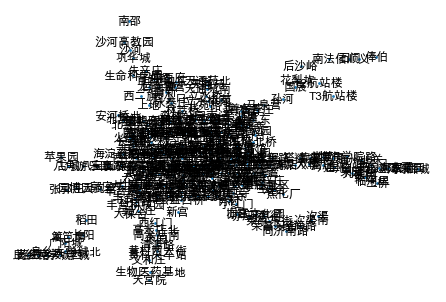

In [13]:
station_graph = nx.Graph()

station_graph.add_nodes_from(station_list)

nx.draw(station_graph, station_info, with_labels=True, node_size=3)

In [14]:
line_2_station = {
    '房山线': ['苏庄', '良乡南关', '良乡大学城西', '良乡大学城', '良乡大学城北', '广阳城', '篱笆房', '长阳', '稻田', '大葆台', '郭公庄'],
    '9号线': ['郭公庄', '丰台科技园', '科怡路', '丰台南路', '丰台东大街', '七里庄', '六里桥', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆'],
    '14号线西段': ['张郭庄', '园博园', '大瓦窑', '郭庄子', '大井', '七里庄', '西局'],
    '14号线东段': ['善各庄', '来广营', '东湖渠', '望京', '阜通', '望京南', '高家园', '将台', '东风北桥', '枣营', '朝阳公园', '金台路', '大望路', '九龙山', '平乐园', '十里河', '方庄', '蒲黄榆', '永定门外', '北京南站'],
    '10号线': ['巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '安贞门', '惠新西街南口', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河', '分钟寺', '成寿寺', '宋家庄', '石榴庄', '大红门', '角门东', '角门西', '草桥', '纪家庙', '首经贸', '丰台站', '泥洼', '西局', '六里桥', '莲花桥', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营'],
    '6号线': ['潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通运门', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '车公庄西', '白石桥南', '花园桥', '慈寿寺', '海淀五路居'],
    '4号线': ['天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '西单', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北'],
    '13号线': ['西直门', '大钟寺', '知春路', '五道口', '上地', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门'],
    '昌平线': ['南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗'],
    '8号线': ['南锣鼓巷', '什刹海', '鼓楼大街', '什刹海', '安华桥', '北土城', '奥体中心', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '回龙观东大街', '平西府', '育知路'],
    '5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'],
    '7号线': ['焦化厂', '双合', '垡头', '欢乐谷景区', '南楼梓庄', '化工', '百子湾', '大郊亭', '九龙山', '双井', '广渠门外', '广渠门内','磁器口', '桥湾', '珠市口', '虎坊桥', '菜市口', '广安门内', '达官营', '湾子', '北京西站'],
    '亦庄线': ['宋家庄', '肖村', '小红门', '旧宫', '亦庄桥', '亦庄文化园', '万源街', '荣京东街', '荣昌东街', '同济南路', '经海路', '次渠南', '次渠'],
    '15号线': ['俸伯', '顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '关庄', '大屯路东', '安立路', '奥林匹克公园', '北沙滩', '六道口', '清华东路西口'],
    '2号线': ['积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门'],
    '1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '高碑店', '传媒大学', '双桥', '管庄', '八里桥', '通州北苑', '果园', '九棵树', '梨园', '临河里', '土桥']
}

In [15]:
#建立每个站所属线路的dict，为之后计算换乘做准备
station_2_line = defaultdict(list)

for key in line_2_station.keys():
    line = line_2_station[key]
    for station in line:
        station_2_line[station].append(key)

In [16]:
station_2_line

defaultdict(list,
            {'苏庄': ['房山线'],
             '良乡南关': ['房山线'],
             '良乡大学城西': ['房山线'],
             '良乡大学城': ['房山线'],
             '良乡大学城北': ['房山线'],
             '广阳城': ['房山线'],
             '篱笆房': ['房山线'],
             '长阳': ['房山线'],
             '稻田': ['房山线'],
             '大葆台': ['房山线'],
             '郭公庄': ['房山线', '9号线'],
             '丰台科技园': ['9号线'],
             '科怡路': ['9号线'],
             '丰台南路': ['9号线'],
             '丰台东大街': ['9号线'],
             '七里庄': ['9号线', '14号线西段'],
             '六里桥': ['9号线', '10号线'],
             '六里桥东': ['9号线'],
             '北京西站': ['9号线', '7号线'],
             '军事博物馆': ['9号线', '1号线'],
             '白堆子': ['9号线'],
             '白石桥南': ['9号线', '6号线'],
             '国家图书馆': ['9号线', '4号线'],
             '张郭庄': ['14号线西段'],
             '园博园': ['14号线西段'],
             '大瓦窑': ['14号线西段'],
             '郭庄子': ['14号线西段'],
             '大井': ['14号线西段'],
             '西局': ['14号线西段', '10号线'],
             '善各庄': ['14号线东段'],
             '

In [17]:
#建立每个站与其连接的所有站的dict
station_connection = defaultdict(list)
#每个站与其之前相连的站
for key in line_2_station.keys():
    for i in range(len(line_2_station[key])-1):
        station_connection[line_2_station[key][i]].append(line_2_station[key][i+1])
#每个站与其之后相连的站       
for key in line_2_station.keys():
    for i in range(len(line_2_station[key])-1):
        station_connection[line_2_station[key][-i-1]].append(line_2_station[key][-i-2])
        
#补充环状线的连接站点
station_connection['巴沟'].append('火器营')
station_connection['火器营'].append('巴沟')
station_connection['积水潭'].append('西直门')
station_connection['西直门'].append('积水潭')

In [18]:
station_connection

defaultdict(list,
            {'苏庄': ['良乡南关'],
             '良乡南关': ['良乡大学城西', '苏庄'],
             '良乡大学城西': ['良乡大学城', '良乡南关'],
             '良乡大学城': ['良乡大学城北', '良乡大学城西'],
             '良乡大学城北': ['广阳城', '良乡大学城'],
             '广阳城': ['篱笆房', '良乡大学城北'],
             '篱笆房': ['长阳', '广阳城'],
             '长阳': ['稻田', '篱笆房'],
             '稻田': ['大葆台', '长阳'],
             '大葆台': ['郭公庄', '稻田'],
             '郭公庄': ['丰台科技园', '大葆台'],
             '丰台科技园': ['科怡路', '郭公庄'],
             '科怡路': ['丰台南路', '丰台科技园'],
             '丰台南路': ['丰台东大街', '科怡路'],
             '丰台东大街': ['七里庄', '丰台南路'],
             '七里庄': ['六里桥', '西局', '丰台东大街', '大井'],
             '六里桥': ['六里桥东', '莲花桥', '七里庄', '西局'],
             '六里桥东': ['北京西站', '六里桥'],
             '北京西站': ['军事博物馆', '六里桥东', '湾子'],
             '军事博物馆': ['白堆子', '木樨地', '北京西站', '公主坟'],
             '白堆子': ['白石桥南', '军事博物馆'],
             '白石桥南': ['国家图书馆', '花园桥', '白堆子', '车公庄西'],
             '张郭庄': ['园博园'],
             '园博园': ['大瓦窑', '张郭庄'],
             '大瓦窑': ['

#### 3. Build the search agent

Build the search agent based on the graph you built.

for example, if you use Beijing subway graph, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [19]:
#计算两个站之间的直线距离
def get_station_distance(station1, station2):
    return geo_distance(station_info[station1], station_info[station2])

In [20]:
#计算一条路线的总距离
def get_distance_of_path(path: list):
    distance = 0
    for i, _ in enumerate(path[:-1]):
        distance += get_station_distance(path[i], path[i+1])
    return distance

In [21]:
#将所有可能的路线按距离排序，取最短距离的路线
def sort_by_distance(pathes: list):
    sorted_pathes = sorted(pathes, key=get_distance_of_path)
    return sorted_pathes

In [24]:
# 得到途中所有经过的线路
def get_transfers_list(path: list):
    line_trans = []
    line = ''
    for i in np.arange(1, len(path)):
        # 这个判断是处理换乘站，比如从1号线换到10号线时，换乘站既包含1号线也包含10号线
        if line in station_2_line[path[i]]:
            continue
        first_line = station_2_line[path[i-1]]
        second_line = station_2_line[path[i]]
        line = list(set(first_line).intersection(set(second_line)))[0]
        line_trans.append(line)
    
    return line_trans

In [25]:
def BFS_by_distance(connection, start, destination, search_strategy=None):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        #取到第一条线路的目前最后一站，找接下来所连接的站
        frontier = path[-1]
        #取到该站可能连接的所有站
        successsors = connection[frontier]
        
        for station in successsors:
            if station in path:
                continue
            new_path = path + [station]
            pathes.append(new_path)
        
        if search_strategy:
            pathes = search_strategy(pathes)
        
        if pathes and destination==pathes[0][-1]:
            #计算换乘的路线
            lines = get_transfers_list(pathes[0])
            
            trans = lines[0]
            for x in lines[1:]:
                trans += ' --> ' + x
            
            station_route = pathes[0][0]
            for x in pathes[0][1:]:
                station_route += ' --> ' + x
                
            return station_route, trans


In [26]:
BFS_by_distance(station_connection, '慈寿寺', '菜市口', search_strategy=sort_by_distance)

('慈寿寺 --> 西钓鱼台 --> 公主坟 --> 军事博物馆 --> 木樨地 --> 南礼士路 --> 复兴门 --> 长椿街 --> 宣武门 --> 菜市口',
 '10号线 --> 1号线 --> 2号线 --> 4号线')

In [27]:
BFS_by_distance(station_connection, '国贸', '林萃桥', search_strategy=sort_by_distance)

('国贸 --> 永安里 --> 建国门 --> 朝阳门 --> 东四 --> 南锣鼓巷 --> 什刹海 --> 安华桥 --> 北土城 --> 奥体中心 --> 奥林匹克公园 --> 森林公园南门 --> 林萃桥',
 '1号线 --> 2号线 --> 6号线 --> 8号线')

### (Optional) Improve your agent to make it able to find a path based on different strategies

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

In [28]:
def get_trans_times(path: list):
    return len(get_transfers_list(path)) - 1

In [29]:
def sort_by_transfer_times(pathes: list):
    return sorted(pathes, key=get_trans_times)

In [30]:
BFS_by_distance(station_connection, '慈寿寺', '菜市口', search_strategy=sort_by_transfer_times)

('慈寿寺 --> 西钓鱼台 --> 公主坟 --> 莲花桥 --> 六里桥 --> 西局 --> 泥洼 --> 丰台站 --> 首经贸 --> 纪家庙 --> 草桥 --> 角门西 --> 马家堡 --> 北京南站 --> 陶然亭 --> 菜市口',
 '10号线 --> 4号线')

In [31]:
BFS_by_distance(station_connection, '国贸', '林萃桥', search_strategy=sort_by_transfer_times)

('国贸 --> 金台夕照 --> 呼家楼 --> 团结湖 --> 农业展览馆 --> 亮马桥 --> 三元桥 --> 太阳宫 --> 芍药居 --> 惠新西街南口 --> 安贞门 --> 北土城 --> 奥体中心 --> 奥林匹克公园 --> 森林公园南门 --> 林萃桥',
 '10号线 --> 8号线')

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 